# Réalisez une régression linéaire from scratch

## Import des packages

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1 : implémenter la normalisation (centrage et réduction)

Formule de la standardisation
![centrage_reduction](CR.png)

In [138]:
## Coder Ici
mu_list = []
std_list = []

def normalize(data):
	for i in range(0,data.shape[1]-1):
		mu = np.mean(data[:,i])
		std = np.std(data[:, i])
		mu_list.append(mu)
		std_list.append(std)
		data[:,i] = ((data[:,i] - mu)/std)

In [139]:
## Test
test_data = np.array([[2,3,5],
                     [5,6,9],
                     [3,8,4]])
normalize(test_data)
assert (test_data.round(1) == np.array([
    [-1, -1,  5], 
    [ 1,  0,  9], 
    [ 0,  1,  4]])).all()

### Import des données normalisées

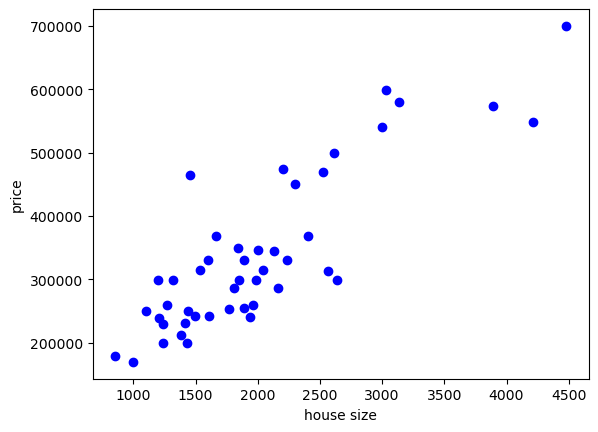

In [140]:
mu_list = []
std_list = []
def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def load_data(filename):
	df = pd.read_csv(filename, sep=",", index_col=False)
	df.columns = ["housesize", "rooms", "price"]
	data = np.array(df, dtype=float)
	plot_data(data[:,:2], data[:, -1])
	normalize(data)
	return data[:,:2], data[:, -1]

x,y = load_data("house_price_data.txt")

## Question n°2 : Implémenter la fonction h(x)

Les implémentations des fonctions suivantes sont vectorisées

![h(x)](h(x).png)

In [141]:
## Coder ici
def h(theta,x):
	return np.matmul(x, theta)

In [142]:
## Test
x_test = np.array([[2,3],
              [5,6]])
theta_test = np.array([2,3])

assert (h(theta_test, x_test).round(1) == np.array([13, 28])).all() 

## Question n°3 : Implémenter la fonction coût

![h](cost_function.png)

In [143]:
## Coder ici
def cost_function(x, y, theta):
	return ((h(theta,x)-y).T@(h(theta,x)-y))/(2*y.shape[0])

In [144]:
cost_function(x_test, y_test, theta_test)

224.5

In [145]:
## Test
x_test = np.array([[2,3],
              [5,6]])

y_test = np.array([1,0])

theta_test = np.array([2,3])

assert(cost_function(x_test, y_test, theta_test).round(2) == 232.0)

## Question n°4 : Implémenter la descente du gradient

une epoch c

In [146]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(theta,x )
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

In [147]:
x_test = np.array([[3,3],
              [5,6]])

y_test = np.array([0,1])

theta_test = np.array([2,3])

theta_test, J_all_test = gradient_descent(x_test, y_test, theta_test, learning_rate=0.1, num_epochs=1)

assert (theta_test.round(2) == np.array([-7.  , -7.35])).all()


assert (J_all_test[0].round(2) == 2067.33)

## Tester votre code

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


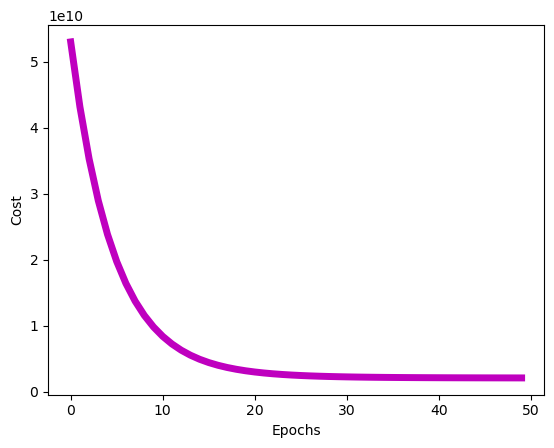

Price of house:  [311311.48999522]


In [148]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()
    
    
def test(theta, x):
	x[0] = (x[0] - mu_list[0])/std_list[0]
	x[1] = (x[1] - mu_list[1])/std_list[1]
	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)
    
    
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1800, 4])